In [21]:
import cv2
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [22]:
# PARAMETERS
path = 'img/'  # 원본이미지 경로
proc_path = 'proc_img/'  # 이진화 후 이미지 경로
sp_path = 'sp_img/'  
filename = 'image02.png'
sp_filename = filename.split('.')
proc_filename = sp_filename[0] + '_proc.' + sp_filename[1]
# plt.style.use('dark_background')

In [23]:
# 이미지 출력 함수
def imshow(img):
    plt.figure(figsize=(20, 10))
    plt.imshow(img, cmap='gray')
    plt.show()

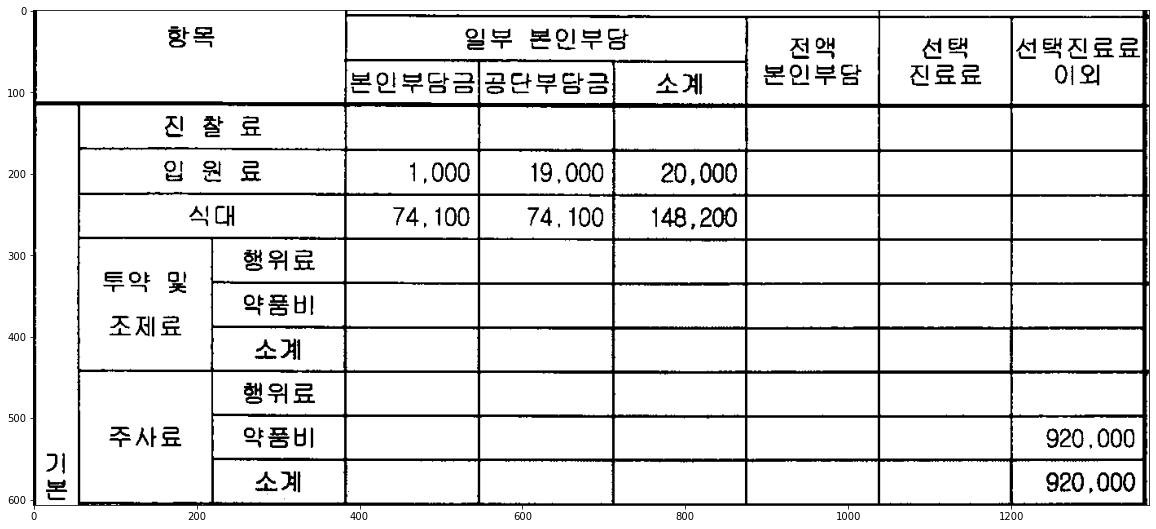

In [24]:
img = cv2.imread(path+filename, cv2.IMREAD_GRAYSCALE)
img_dim = img.shape

# 이진화
bi_thr = 190
ret, bi_img = cv2.threshold(img, bi_thr, 255, cv2.THRESH_BINARY)

cv2.imwrite(proc_path+proc_filename, bi_img)
imshow(bi_img)

* 이미지크기 확인

In [25]:
bi_img.shape

(607, 1370)

* erotion, dilation

In [9]:
kernel_erode = np.ones((3, 3), np.uint8)
erotion = cv2.erode(bi_img, kernel_erode, iterations=1)

kernel_del_row = np.ones((1, 30), np.uint8)
dilation_row = cv2.dilate(erotion, kernel_del_row, iterations=1)

kernel_del_col = np.ones((30, 1), np.uint8)
dilation_col = cv2.dilate(erotion, kernel_del_col, iterations=1)

* 라인지우기

In [14]:
mod_img = copy.deepcopy(bi_img)

for row_id in range(dilation_row.shape[0]):
    for col_id in range(dilation_row.shape[1]):
        if dilation_row[row_id, col_id] == 0:
            mod_img[row_id, col_id] = 255
        if dilation_col[row_id, col_id] == 0:
            mod_img[row_id, col_id] = 255

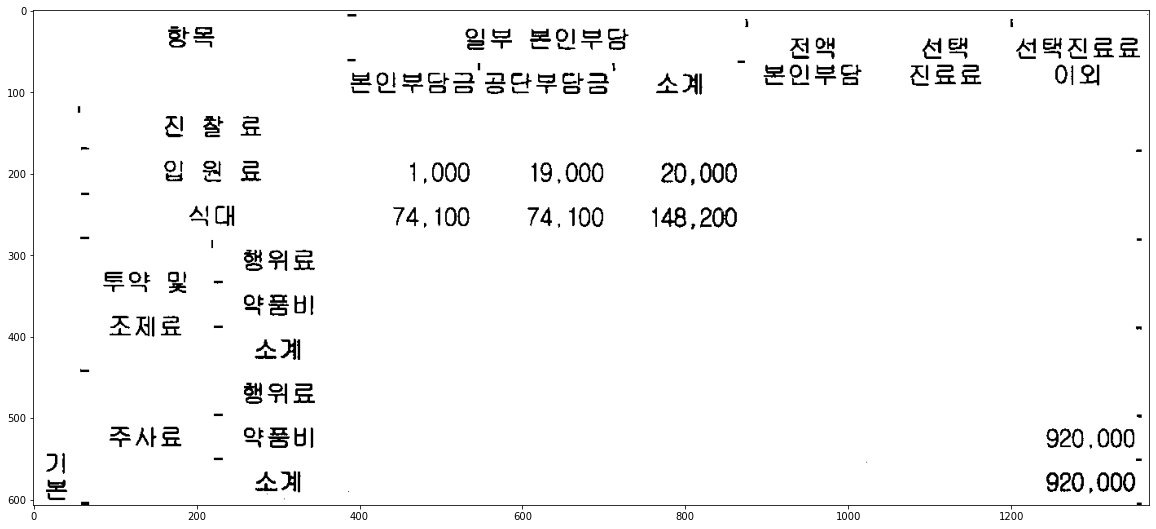

In [15]:
imshow(mod_img)

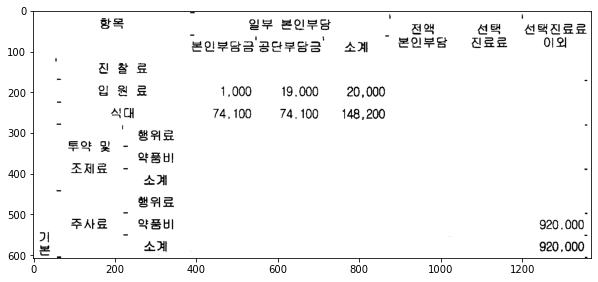

In [16]:
k = np.ones((1, 1), np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.dilate(mod_img, k, iterations=1), cmap='gray')

In [17]:
kernel_del_col = np.ones((32, 1), np.uint8)
dilation_col = cv2.dilate(erotion, kernel_del_col, iterations=1)

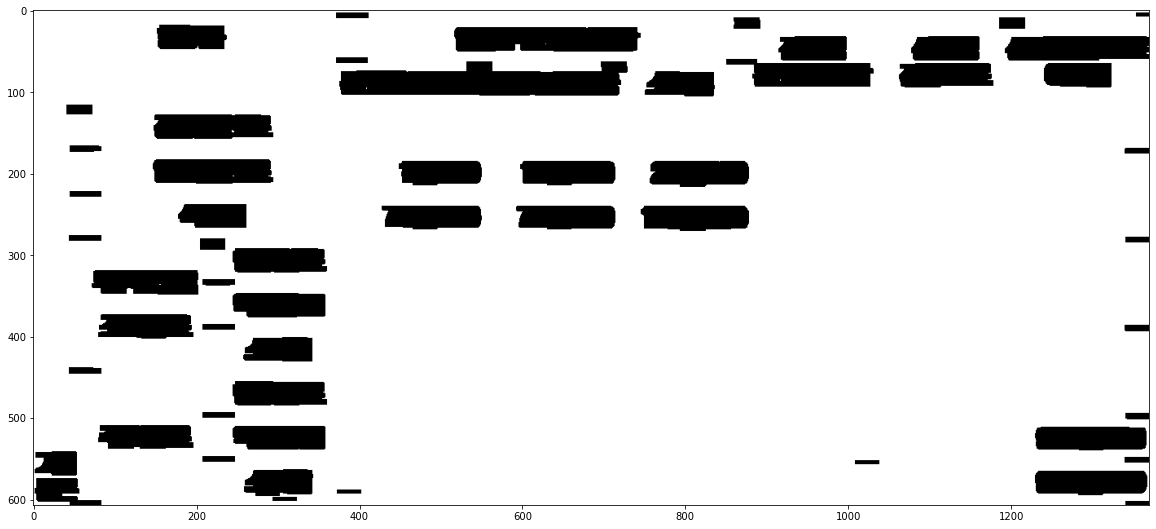

In [18]:
# text box dilation
box_kernel = np.ones((5, 30), np.uint8)
box_erotion = cv2.erode(mod_img, box_kernel, iterations=1)
imshow(box_erotion)

---

* 배경 마진

In [19]:
end_margin = 10

box_erotion[0:end_margin, :] = 255
box_erotion[-end_margin:, :] = 255
box_erotion[:, 0: end_margin] = 255
box_erotion[:, -end_margin: ] = 255

* 가장자리 검출

In [20]:
img_color = cv2.cvtColor(box_erotion,cv2.COLOR_GRAY2RGB)
ret, bi_img = cv2.threshold(img, bi_thr, 255, cv2.THRESH_BINARY)


contours, hierarchy = cv2.findContours(img_bi, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) 

text_box_ls = list()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt) 
    # text_box_ls.append((x, y, w, h))
    cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 2)
plt.figure(figsize=(20, 20))
plt.imshow(img_color)

NameError: name 'img_bi' is not defined

---

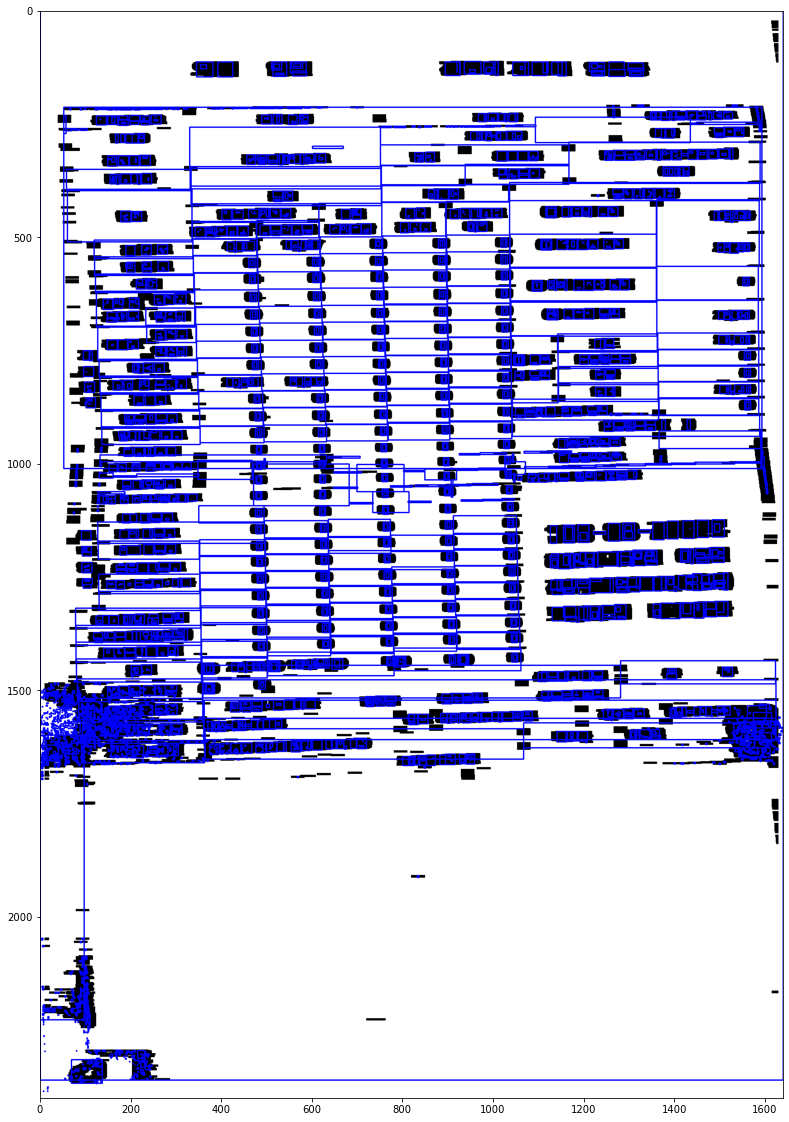

In [65]:
plt.figure(figsize=(20, 20))
plt.imshow(img_color)

In [62]:
img_orig = cv2.imread(path+filename)

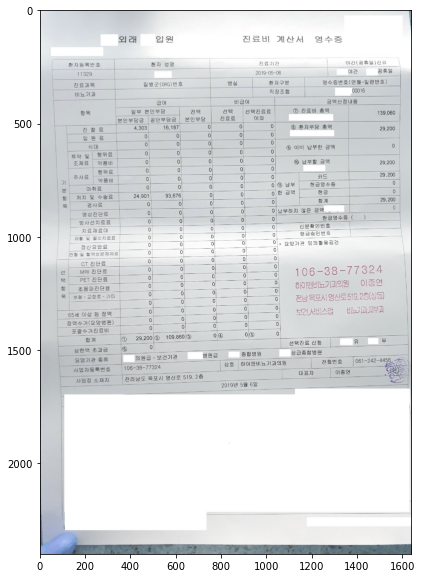

In [63]:
img_orig = cv2.imread(path+filename)
for coord in text_box_ls:
    x, y, w, h = coord[0], coord[1], coord[2], coord[3]
    mar = 2
    if h >= 15:
        cv2.rectangle(img_orig, (x - mar, y - mar), (x + w + mar, y + h + mar), (255, 0, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(img_orig)
plt.show()

In [64]:
custom_oem_psm_config = r'--oem 1 --psm 7'
for n, coord in enumerate(text_box_ls):
    x, y, w, h = coord
    mar = 5
    if h >= 20:
        text_sub_img = mod_img[y-mar: y+h+mar, x-mar: x+w+mar]
        text = pytesseract.image_to_string(text_sub_img, lang = 'kor', config=custom_oem_psm_config)
        print(f'{n+1} : [{y-mar}:{y+h+mar}, {x-mar}: {x+w+mar}]--->  {text}')

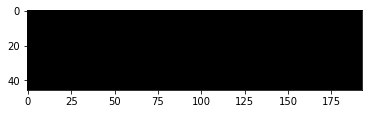